### Predicting Next Day Stock Prices

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, LSTM

#### Load the Data

In [3]:
company='FB'

In [4]:
start= dt.datetime(2012,1,1)

In [5]:
end= dt.datetime(2020,1,1)

In [6]:
data=web.DataReader(company, 'yahoo',start,end)

#### Prepare the Data

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))

In [9]:
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [10]:
prediction_days=60

In [11]:
x_train=[]

In [12]:
y_train=[]

In [13]:
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x,0])

x_train, y_train= np.array(x_train), np.array(y_train)
x_train=np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

#### Build the Model

In [15]:
model = Sequential()

In [16]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))

In [17]:
model.add(Dropout(0.2))

In [18]:
model.add(LSTM(units=50, return_sequences=True))

In [19]:
model.add(Dropout(0.2))

In [20]:
model.add(LSTM(units=50))

In [21]:
model.add(Dropout(0.2))

In [22]:
model.add(Dense(units=1)) # prediction of the next closing 

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
59/59 [==============================] - 19s 103ms/step - loss: 0.0262
Epoch 2/25
59/59 [==============================] - 6s 100ms/step - loss: 0.0039
Epoch 3/25
59/59 [==============================] - 6s 105ms/step - loss: 0.0034
Epoch 4/25
59/59 [==============================] - 6s 105ms/step - loss: 0.0036
Epoch 5/25
59/59 [==============================] - 6s 102ms/step - loss: 0.0040
Epoch 6/25
59/59 [==============================] - 6s 107ms/step - loss: 0.0034
Epoch 7/25
59/59 [==============================] - 6s 101ms/step - loss: 0.0033
Epoch 8/25
59/59 [==============================] - 6s 102ms/step - loss: 0.0026 1
Epoch 9/25
59/59 [==============================] - 6s 103ms/step - loss: 0.0026
Epoch 10/25
59/59 [==============================] - 6s 99ms/step - loss: 0.0031
Epoch 11/25
59/59 [==============================] - 6s 93ms/step - loss: 0.0030
Epoch 12/25
59/59 [==============================] - 6s 96ms/step - loss: 0.0025
Epoch 13/25
59/59 [======

### Test the Model Accuracy on Existing Data

####  load Test Data

In [27]:
test_start=dt.datetime(2020,1,1)

In [28]:
test_end=dt.datetime.now()

In [29]:
test_data=web.DataReader(company,'yahoo', test_start, test_end)

In [30]:
actual_prices=test_data['Close'].values

In [31]:
total_dataset=pd.concat((data['Close'],test_data['Close']),axis=0)

In [32]:
model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values

In [33]:
model_inputs=model_inputs.reshape(-1,1)

In [34]:
model_inputs=scaler.transform(model_inputs)

#### make prediction on Test Data

In [36]:
x_test=[]

In [37]:
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

In [38]:
x_test=np.array(x_test)

In [39]:
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [40]:
predicted_prices=model.predict(x_test)

In [41]:
predicted_prices=scaler.inverse_transform(predicted_prices)

#### Plot the Test Predictions

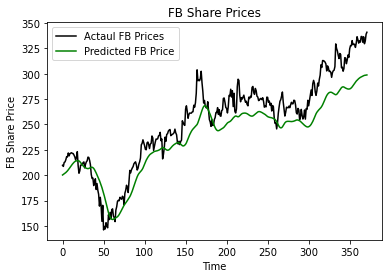

In [44]:
plt.plot(actual_prices, color='black',label=f'Actaul {company} Prices')
plt.plot(predicted_prices,color='green',label=f'Predicted {company} Price')
plt.title(f'{company} Share Prices')
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

#### Predicting Next Day

In [46]:
real_data=[model_inputs[len(model_inputs)+ 1- prediction_days:len(model_inputs+1),0]]

In [47]:
real_data=np.array(real_data)

In [48]:
real_data=np.reshape(real_data, (real_data.shape[0],real_data.shape[1],1))

In [49]:
prediction=model.predict(real_data)

In [50]:
prediction=scaler.inverse_transform(prediction)

In [51]:
print(f'Prediction:{prediction}')

Prediction:[[299.15335]]
